### Testing env 

This notebook is to test the environment wrapper and payloads of the environment 



Not explicitly stated in the wiki but this is an AEC env, hence must interact with the agent one at a time 

```
for agent in agent.iter():
    perform some action for agent
``` 


but a parallel_env is also exposed for parallel training => env = gridworld.parallel_env() 

In [11]:
from til_environment import gridworld
import matplotlib.pyplot as plt

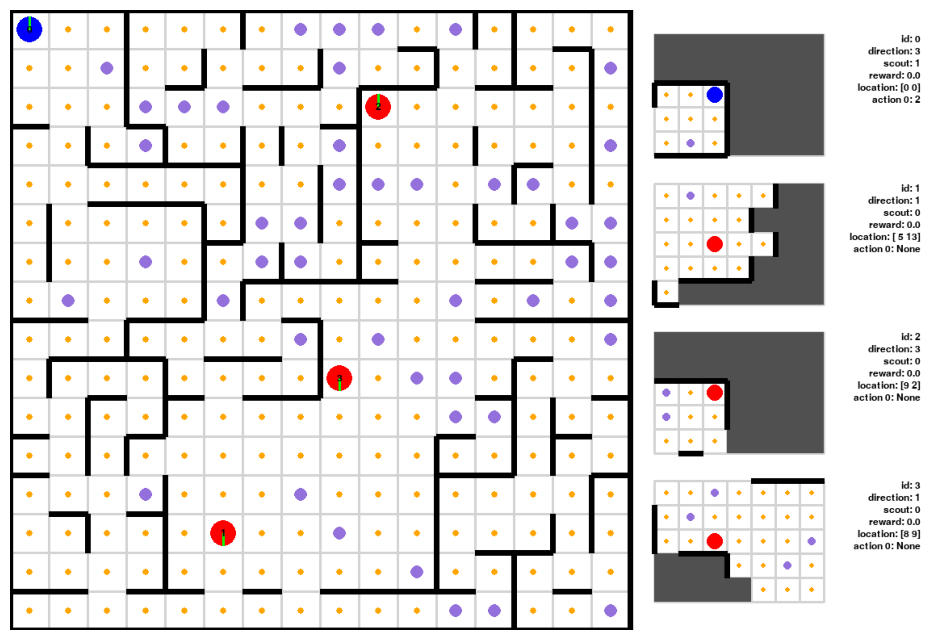

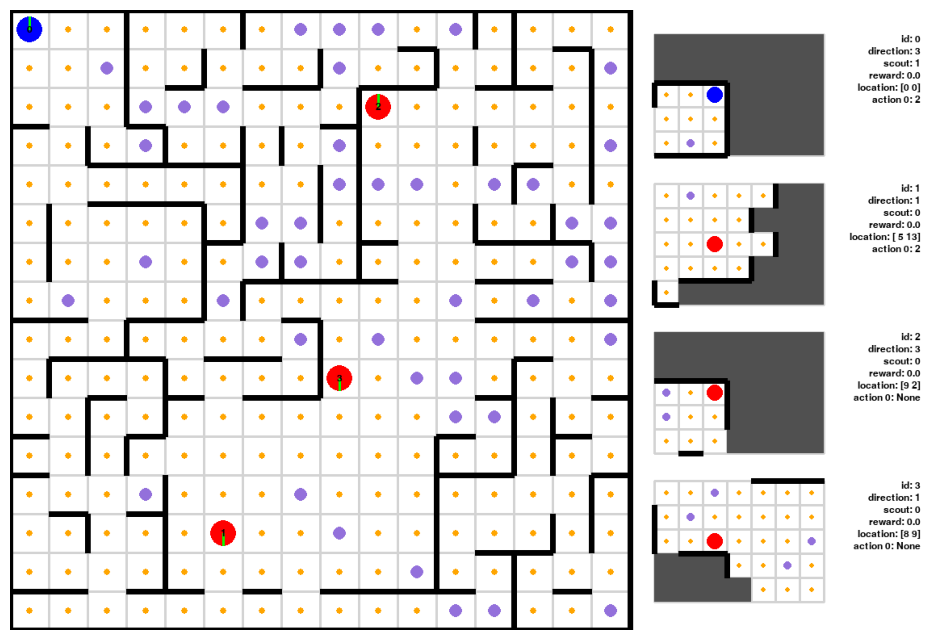

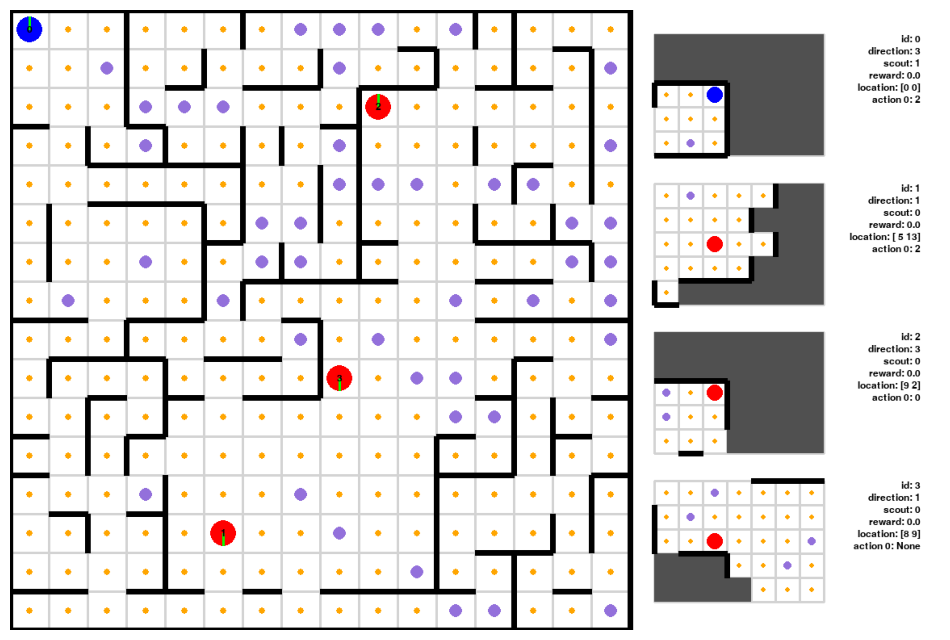

In [16]:
RENDER_MODE = 'rgb_array'  # / "rgb_array" / 'human'

env = gridworld.env(
    env_wrappers=[],
    render_mode=RENDER_MODE,  
    debug=True, 
    novice=False,  
)

env.reset(seed=42)

count = 0 


for agent in env.agent_iter():

    observation, reward, termination, truncation, info = env.last()

    if termination or truncation:
        break
    else:
        # actual policy goes here 
        action = env.action_space(agent).sample()

    env.step(action)

    # rendering if RGB used 
    if RENDER_MODE == 'rgb_array' and count < 3:
        frame = env.render()

        plt.figure(figsize=(12, 12))
        plt.imshow(frame)
        plt.axis("off")
        plt.show()
    
    count += 1 


In [7]:
print(observation)
print(reward)
print(termination)
print(truncation)
print(info)

{'viewcone': array([[  0, 193,  65,  97,   0],
       [  0, 129,   1,  33,   0],
       [  0, 130,   5,  49,   0],
       [211,  50, 130,  98,   0],
       [  0,   0,   2,  34,   0],
       [  0,   0,  34, 162,   0],
       [  0,   0,  34, 162,   0]], dtype=uint8), 'direction': np.int64(1), 'location': array([1, 2]), 'scout': 1, 'step': 100}
0
False
True
{'distance': np.float64(0.0), 'manhattan': np.int64(0)}


In [ ]:
# observation = {
#     viewcone: 7 * 5 matrix, 
#     direction: integer => 0 right, 1 bottom...
#     location: 2d coordinate, 
#     scout: bool, 1 if scout else guard, 
#     step: game time (100 in this case since no termination)
# }